In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import matplotlib
import platform
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [39]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [41]:
sel = ['Pclass', 'SibSp', 'Parch']

X_train = train[sel]
Y_train = train['Survived']
X_test = test[sel]

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, Y_train)

LogisticRegression()

In [44]:
pred = model.predict(X_test)

In [45]:
pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [46]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
sub['Survived'] = pred

In [48]:
sub.to_csv('first_submission.csv', index=False)

In [49]:
for col in train.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

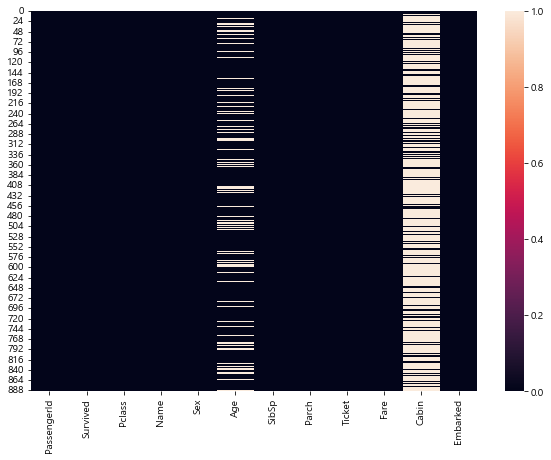

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull())

<AxesSubplot:>

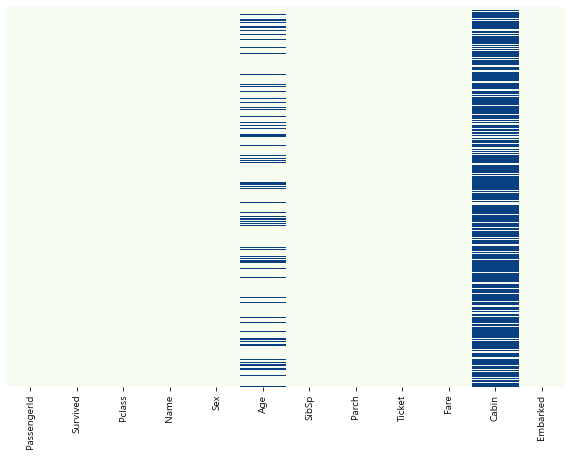

In [52]:
plt.figure(figsize=(10,7)) # cmpa : summer도 해보기
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="GnBu") 

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


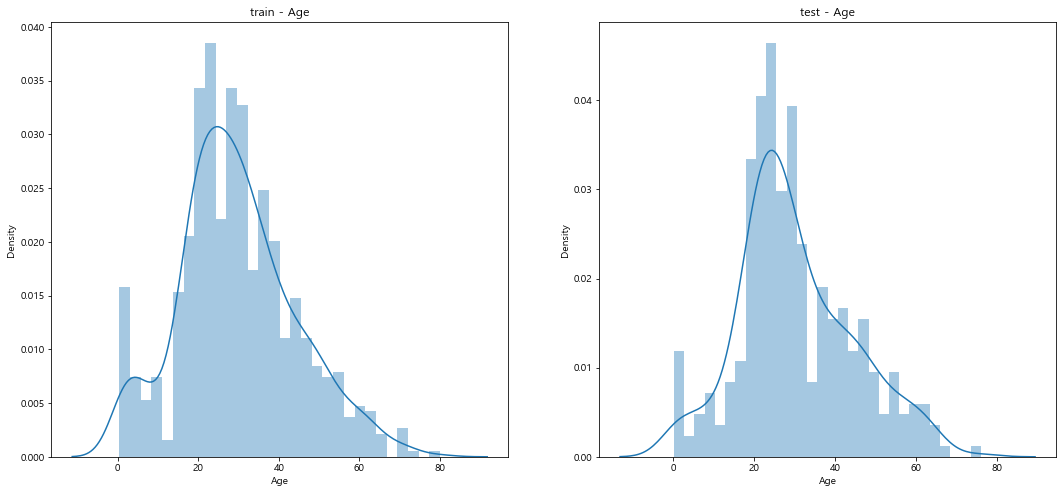

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30, ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30, ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

In [54]:
train['Age'] = train["Age"].fillna(train['Age'].mean())

In [55]:
test['Age'] = test["Age"].fillna(test['Age'].mean())

In [56]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
train['Fare'] = train["Fare"].fillna(train['Fare'].mean())
test['Fare'] = test["Fare"].fillna(test['Fare'].mean())

In [59]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
train['Embarked'] = train["Embarked"].fillna('S')
test['Embarked'] = test["Embarked"].fillna('S')

In [61]:
train['Embarked'].isnull().sum()

0

In [62]:
a = [1,2,3,4,5,6,7,8,9,10,10000]
np.median(a)

6.0

In [63]:
train['Sex'] = train['Sex'].map({'female':0, 'male':1}).astype(int)
test['Sex'] = test['Sex'].map({'female':0, 'male':1}).astype(int)
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [64]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

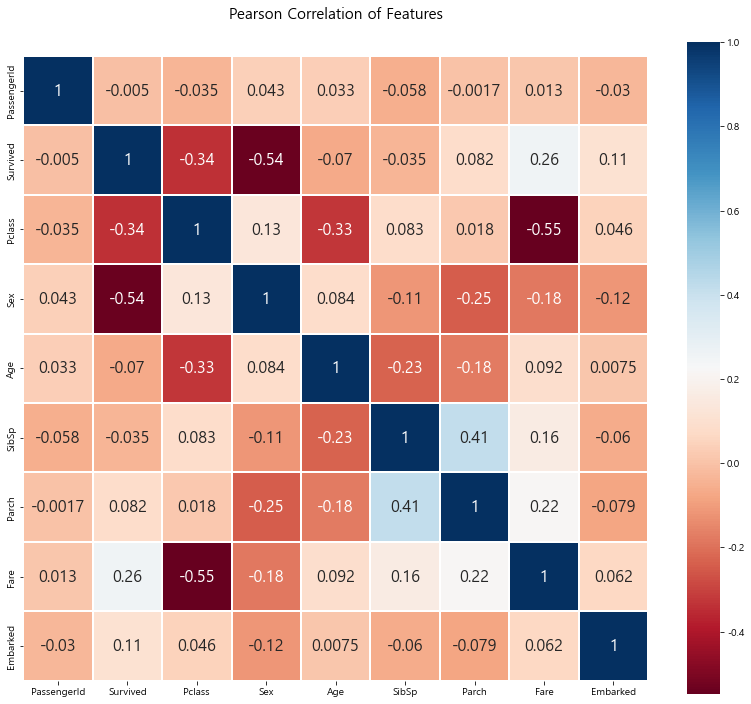

In [65]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

In [66]:
# 'Name', 'Ticket' =>  문자포함
sel = ['Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [67]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_train, y_train)

LogisticRegression()

In [68]:
pred = log_r.predict(X_test)
pred[:15]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [69]:
sub = pd.read_csv("sample_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [70]:
sub['Survived'] = pred
sub.to_csv("logistic_second_model.csv", index=False)

In [79]:
train['Cabin_bool'] = train['Cabin'].isnull().astype(int)

In [83]:
test['Cabin_bool'] = test['Cabin'].isnull().astype(int)

In [84]:
train['Cabin_bool'], test['Cabin_bool']

(0      1
 1      0
 2      1
 3      0
 4      1
       ..
 886    1
 887    0
 888    1
 889    0
 890    1
 Name: Cabin_bool, Length: 891, dtype: int32,
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Cabin_bool, Length: 418, dtype: int32)

In [81]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1,0


In [85]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,NaN,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,NaN,2,1
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,NaN,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,NaN,0,1


In [86]:
# 'Name', 'Ticket' =>  문자포함
sel = ['Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked', 'Cabin_bool']

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [87]:
log_r = LogisticRegression()
log_r.fit(X_train, y_train)

LogisticRegression()

In [88]:
pred = log_r.predict(X_test)
pred[:15]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [89]:
sub = pd.read_csv("sample_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [90]:
sub['Survived'] = pred
sub.to_csv("logistic_third_model.csv", index=False)

In [91]:
train['NameLength'] = train['Name'].apply(lambda x:len(x))
test['NameLength'] = test['Name'].apply(lambda x:len(x))

train['NameLength'].unique(), test['NameLength'].unique()

(array([23, 51, 22, 44, 24, 16, 30, 49, 35, 31, 27, 36, 32, 20, 28, 55, 21,
        29, 57, 19, 46, 34, 56, 40, 17, 25, 45, 26, 50, 13, 15, 33, 18, 52,
        47, 38, 37, 41, 14, 42, 39, 82, 48, 54, 43, 67, 65, 53, 61, 12],
       dtype=int64),
 array([16, 32, 25, 44, 26, 20, 28, 41, 23, 45, 55, 17, 37, 22, 36, 31, 47,
        29, 40, 49, 24, 48, 19, 18, 15, 13, 27, 21, 46, 33, 51, 30, 35, 52,
        59, 54, 38, 53, 42, 62, 39, 34, 43, 58, 14, 63], dtype=int64))

In [92]:
# 'Name', 'Ticket' =>  문자포함
sel = ['Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked', 'Cabin_bool', 'NameLength']

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [94]:
log_r = LogisticRegression(max_iter=1000)
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [95]:
pred = log_r.predict(X_test)
pred[:15]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [96]:
sub = pd.read_csv("sample_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [97]:
sub['Survived'] = pred
sub.to_csv("logistic_fourth_model.csv", index=False)